#### 使用 HR 完成螺旋波

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit, prange
from import_fun import HR, Synapse, create_diffusion_No_flow2D_4, create_diffusion_No_flow2D_8

In [6]:
Nx = 200
Ny = 200
method = "euler"
dt = 0.01

In [7]:
@njit
def index(i, j, N_j):
    """
        将二维索引转换为一维索引。
        i: int, 二维索引的第一个维度。
        j: int, 二维索引的第二个维度。
        N_j: int, 第二个维度的长度。
    """
    return i * N_j + j

In [ ]:
# 生成节点，初始值设定
nodes = HR(N=Nx*Ny, method=method, dt=dt)
nodes.vars_nodes[0, :] = -1.31742
nodes.vars_nodes[1, :] = -7.67799
nodes.vars_nodes[2, :] = 1.12032

# 设定楔形初始值
current_indexs1 = index(np.arange(91, 93)[:, None], np.arange(1, 100), Ny).flatten()
current_indexs2 = index(np.arange(94, 96)[:, None], np.arange(1, 100), Ny).flatten()
current_indexs3 = index(np.arange(97, 99)[:, None], np.arange(1, 100), Ny).flatten()

nodes.vars_nodes[0, current_indexs1] = 2.
nodes.vars_nodes[1, current_indexs1] = 2.
nodes.vars_nodes[2, current_indexs1] = -1.0

nodes.vars_nodes[0, current_indexs2] = 0.
nodes.vars_nodes[1, current_indexs2] = 0.
nodes.vars_nodes[2, current_indexs2] = 0.

nodes.vars_nodes[0, current_indexs3] = -1.
nodes.vars_nodes[1, current_indexs3] = -1.
nodes.vars_nodes[2, current_indexs3] = 2.

nodes.params_nodes["Iex"] = 1.315
nodes.params_nodes["s"] = 3.9
nodes.spiking = False    # 关掉峰值探测器

In [9]:
#设定突触和连接
conn = create_diffusion_No_flow2D_4(Nx, Ny)
# conn = create_diffusion_No_flow2D_8(Nx, Ny)
syn = Synapse(nodes, nodes, conn, method=method)
syn.w.fill(2.)  # 设定耦合强度
syn.to_sparse() # 换了耦合配置后重设稀疏化

In [10]:
for i in range(1000_00):
    Isyn = syn()
    nodes(Isyn)

In [11]:
mem = nodes.vars_nodes[0].reshape(Nx, Ny)

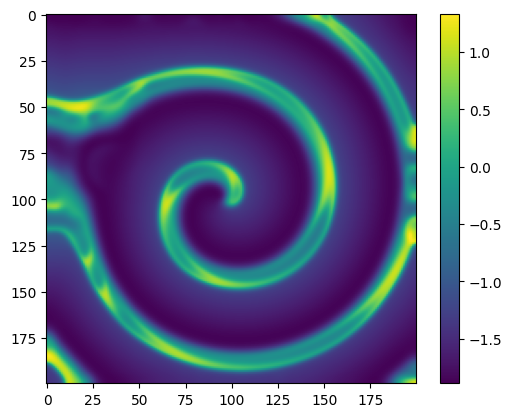

In [12]:
plt.imshow(mem)
plt.colorbar()
plt.show()